In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()  
pd.set_option('display.max_columns', 100)

In [10]:
def read_files(train_fn, test_fn, store_fn):
    train = pd.read_csv(train_fn, parse_dates = ['Date'], infer_datetime_format = True)
    test = pd.read_csv(test_fn, parse_dates = ['Date'], infer_datetime_format = True)
    store = pd.read_csv(store_fn)
    
    return train, test, store

In [11]:
train, test, store = read_files('train.csv', 'test.csv', 'store.csv')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [12]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


#### Check the distribution of Sales and Customers.
Filter only when the store is open

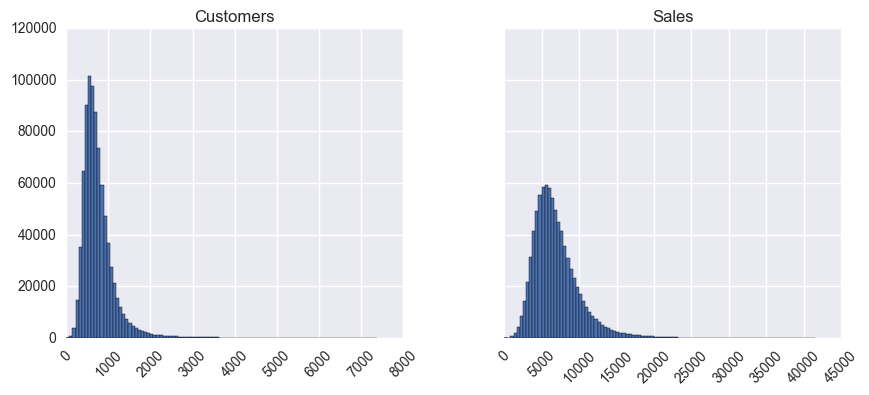

In [13]:
train.query('Open == 1')[['Sales', 'Customers']].hist(bins=100, figsize=(10,4), xrot=45, sharey=True);

#### Let's look at the sales on Week day

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


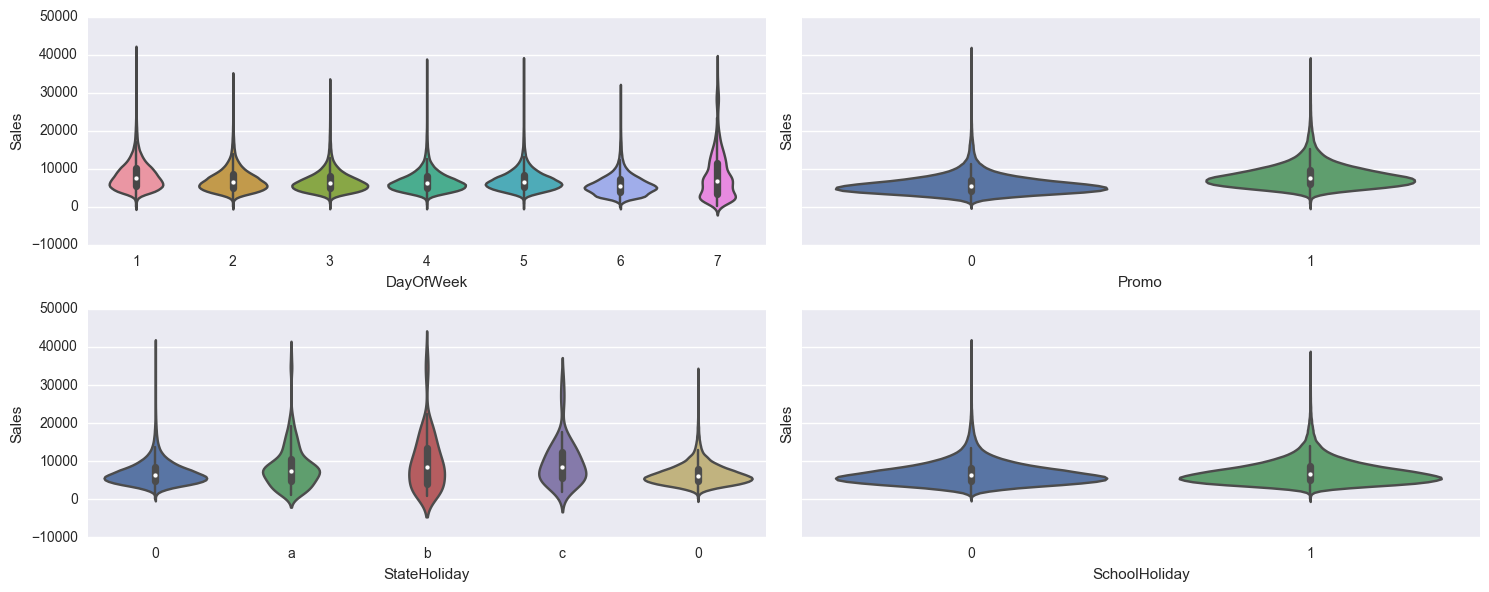

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)

open_df = train.query('Open == 1')[['Sales','DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday']]
sns.violinplot('DayOfWeek', 'Sales', data=open_df, ax=ax1)
sns.violinplot('Promo', 'Sales', data=open_df, ax=ax2)
sns.violinplot('StateHoliday', 'Sales', data=open_df, ax=ax3)
sns.violinplot('SchoolHoliday', 'Sales', data=open_df, ax=ax4)

fig.set_size_inches(15,6)
fig.tight_layout()
fig.show()

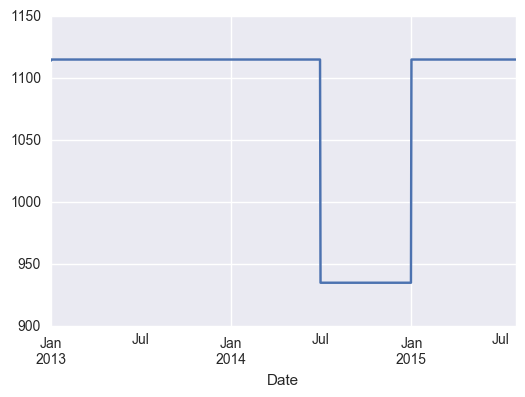

In [15]:
train.groupby('Date')['Store'].size().plot(kind='line');

#### There are days in the training set where some stores are missing. Lets add those missing stores with Open flag as '0' and Customers and Sales values as '0'

In [16]:
def add_missing_dates(train, all_stores):
    train_m = pd.DataFrame()
    store_by_date = train.groupby('Date')['Store'].nunique().reset_index()
    for i in store_by_date.query('Store != 1115')['Date']:
        diff_stores = all_stores.difference(set(train[train['Date']==i].Store))
        s = list(diff_stores)
        missing = pd.DataFrame(data={
                                 'Date': [i]*len(s), 
                                 'Store': s, 
                                 'Customers': [0]*len(s),
                                 'Sales': [0]*len(s),
                                 'Open': [0]*len(s),
                                 'Promo': [0]*len(s),
                                 'SchoolHoliday': [0]*len(s),
                                 'StateHoliday': ['0']*len(s)
                                }) 
    
        train_m = train_m.append(missing)
        train_m['DayOfWeek'] = train_m.Date.dt.dayofweek+1 
    
    return train_m[['Store','DayOfWeek','Date','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday']]

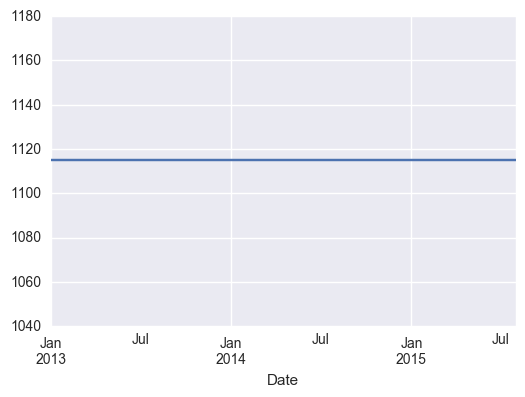

In [17]:
missing_train = add_missing_dates(train, set(store.Store))
train = pd.concat([train, missing_train])
train.groupby('Date')['Store'].size().plot(kind='line');

### Let's analyze the trends in Sales and number of Customers of our train data

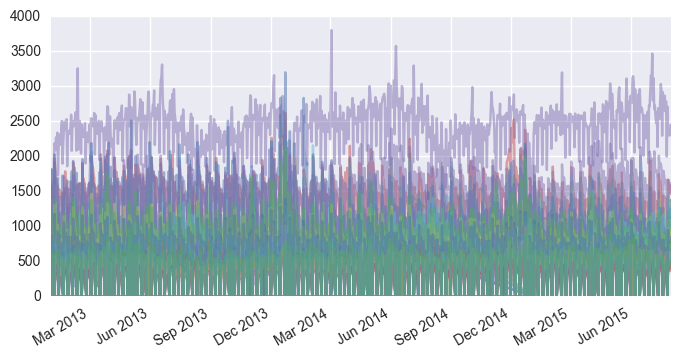

In [37]:
fig = plt.figure(figsize=(8,4))

rand_stores = np.random.randint(0,1115, 50)
for i in rand_stores:
    data = train[(train["Store"] == i)][['Date','Customers']]
    plt.plot_date(data.Date, data.Customers,'-', alpha=0.5)

fig.autofmt_xdate() 

In [38]:
sp = train[['Store','Date','Sales']]
sales_pivot = sp.pivot(index='Store', columns='Date', values='Sales')
col_names = ['col_%d' % i for i in range(len(sales_pivot.columns))]
sales_pivot.columns = col_names


cp = train[['Store','Date','Customers']]
customers_pivot = cp.pivot(index='Store', columns='Date', values='Customers')
customers_pivot.columns = col_names
customers_pivot.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,...,col_892,col_893,col_894,col_895,col_896,col_897,col_898,col_899,col_900,col_901,col_902,col_903,col_904,col_905,col_906,col_907,col_908,col_909,col_910,col_911,col_912,col_913,col_914,col_915,col_916,col_917,col_918,col_919,col_920,col_921,col_922,col_923,col_924,col_925,col_926,col_927,col_928,col_929,col_930,col_931,col_932,col_933,col_934,col_935,col_936,col_937,col_938,col_939,col_940,col_941
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,668,578,619,635,0,785,654,626,615,592,646,0,616,512,530,503,568,688,0,607,667,627,645,676,640,0,549,522,560,571,658,701,0,762,678,693,675,630,656,0,599,572,604,573,607,682,0,710,608,...,422,502,0,586,503,476,498,487,494,0,489,447,414,433,420,463,0,541,568,562,573,538,560,0,540,485,485,480,449,441,0,553,544,550,517,519,512,0,526,469,463,503,459,500,0,612,560,523,546,555
2,0,650,555,574,324,0,763,685,785,637,539,337,0,530,513,591,403,434,303,0,662,656,690,582,522,303,0,488,476,608,517,554,361,0,688,674,769,638,491,354,0,582,504,678,574,494,290,0,757,588,...,480,319,0,762,648,805,594,544,323,0,491,512,654,508,476,303,0,734,877,786,921,1029,1147,0,523,531,693,495,539,311,0,687,645,780,544,495,359,0,564,532,650,521,468,316,0,638,646,727,601,625
3,0,805,721,690,525,0,1079,856,778,791,951,485,0,599,669,617,600,703,427,0,630,797,803,814,773,450,0,722,711,647,648,806,603,0,1070,925,950,861,842,494,0,736,758,680,741,673,488,0,1008,755,...,681,492,0,955,911,821,743,797,424,0,638,779,633,693,698,641,0,817,1072,772,701,742,456,0,734,657,680,691,689,409,0,812,769,865,812,673,417,0,671,661,607,655,607,412,0,768,818,716,823,821
4,0,1429,1248,1232,1514,0,1562,1325,1215,1285,1412,1461,0,1222,1074,1061,1090,1153,1427,0,1556,1323,1207,1203,1409,1326,0,1120,1116,1065,1355,1363,1524,0,1750,1489,1411,1379,1380,1480,0,1386,1199,1193,1219,1147,1432,0,1660,1295,...,1090,1370,0,1473,1352,1254,1138,1281,1311,0,1230,1118,1094,1046,1076,1268,0,1361,1488,1359,1333,1395,1257,0,1373,1103,1134,1185,1245,1401,0,1619,1485,1377,1417,1343,1284,0,1348,1149,1108,1101,1108,1219,0,1379,1191,1258,1276,1498
5,0,577,491,533,202,0,717,613,697,596,562,223,0,567,520,513,464,501,199,0,618,626,667,512,564,187,0,451,472,570,571,576,211,0,679,590,687,559,555,188,0,560,448,568,508,500,196,0,780,475,...,500,234,0,747,671,651,545,610,210,0,497,475,561,472,460,203,0,668,645,717,613,527,225,0,543,507,639,540,530,228,0,719,607,716,571,513,241,0,530,445,503,455,485,228,0,650,598,658,539,559


In [39]:
from sklearn import cluster

cl = cluster.hierarchical.AgglomerativeClustering(n_clusters=5)
clusters = cl.fit_predict(X=customers_pivot)

cl_df = pd.DataFrame({'Store' : customers_pivot.index, 'cluster': clusters}).set_index('Store')
chart_df = train.set_index('Store').join(cl_df)[['Date', 'Customers', 'cluster']]
chart_df.cluster.value_counts().sort_index()

0     32970
1    567084
2    286368
3      5652
4    158256
Name: cluster, dtype: int64

In [44]:
def plot_clusters(df, clu, xcol='Date', ycol='Customers',cluster_label='cluster'):
    fig, axes = plt.subplots(1, cl.n_clusters, sharex=True, sharey=True)
    
    for ax, l in zip(axes, np.unique(cl.labels_)):
        tdf = df.where(df[cluster_label] == l).dropna()
        
        for i in tdf.index.unique():
            data = tdf.loc[i].set_index(xcol).resample('m').agg({ycol: 'sum', cluster_label:'max'}).reset_index()
            
            ax.plot_date(x=data[xcol], 
                         y=data[ycol], 
                         linestyle='solid', 
                         xdate=True, 
                         ydate=False, 
                         alpha=0.6)

    
    fig.set_size_inches(15,6)
    fig.tight_layout()
    fig.autofmt_xdate()

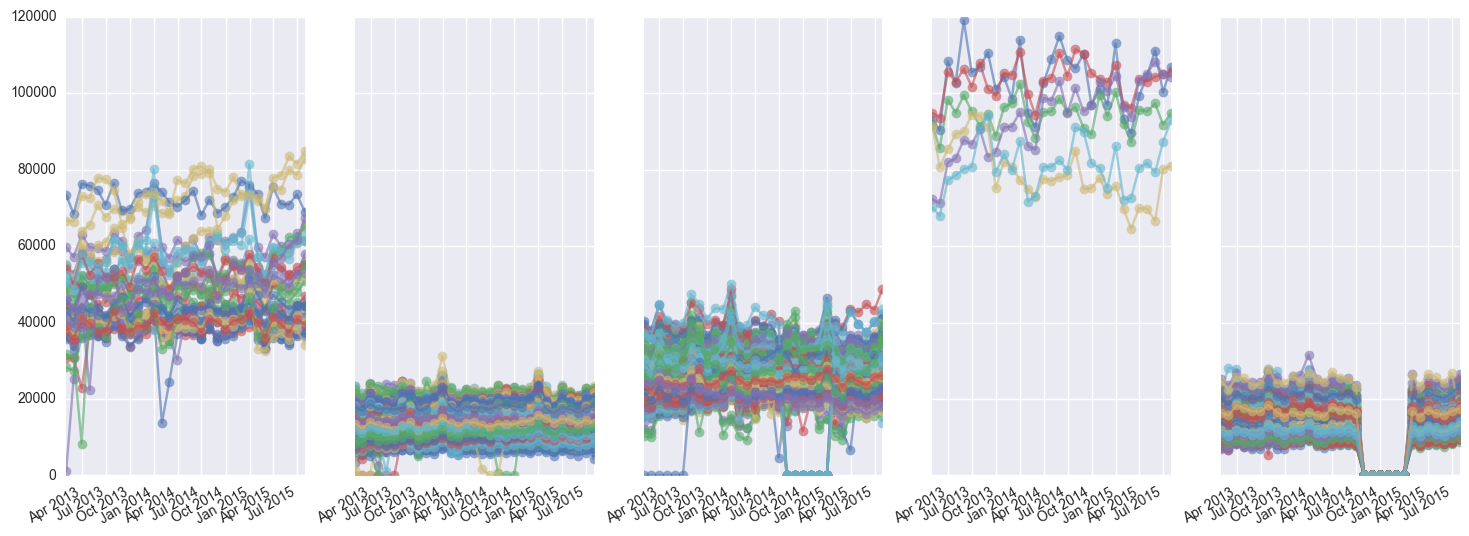

In [45]:
plot_clusters(chart_df, clu=cl)

#### There is a clear split of clusters depending on the trend of the Customers feature.
##### TODO: do some more analysis on each cluster

In [46]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [47]:
print ("Train features:")
print (train.isnull().any())
print ("\n")
print ("Test features:")
print (test.isnull().any())

Train features:
Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool


Test features:
Id               False
Store            False
DayOfWeek        False
Date             False
Open              True
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool


In [48]:
print ("Train features:")
print (train.StateHoliday.value_counts())
print ("\n")
print (train.SchoolHoliday.value_counts())
print ("\n")
print (train.Promo.value_counts())
print ("\n")
print ("Test features:")
print (test.StateHoliday.value_counts())
print ("\n")
print (test.SchoolHoliday.value_counts())
print ("\n")
print (test.Promo.value_counts())

Train features:
0    888208
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64


0    868609
1    181721
Name: SchoolHoliday, dtype: int64


0    662250
1    388080
Name: Promo, dtype: int64


Test features:
0    40908
a      180
Name: StateHoliday, dtype: int64


0    22866
1    18222
Name: SchoolHoliday, dtype: int64


0    24824
1    16264
Name: Promo, dtype: int64


In [49]:
test[test.Open.isnull()].DayOfWeek.value_counts().sort_index()

1    2
2    2
3    2
4    2
5    1
6    2
Name: DayOfWeek, dtype: int64

Open is NULL on all weekdays except Sunday and on dates which are not holiday, so i assume the store is open.
Also i will split the date feature in [year, month, day, weekofyear] features.
There are two ['0'] in train.StateHoliday so merge that as well 

In [50]:
def split_date(df, date_col):
    n_date_year = df[date_col].dt.year
    n_date_month = df[date_col].dt.month
    n_date_weeknum = df[date_col].dt.weekofyear
    n_date_day = df[date_col].dt.day
    
    return df.assign(date_year=n_date_year, date_month=n_date_month, date_weeknum=n_date_weeknum, date_day=n_date_day)
 
train = split_date(train, 'Date')
test = split_date(test, 'Date')

train.StateHoliday = train.StateHoliday.map({'0':'0', 'a':'1', 'b': '2', 'c':'3'})
test.Open = test.Open.fillna(1)

In [51]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [52]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [53]:
def myPinterval(x):
    if x=='Feb,May,Aug,Nov':  return([0,1,0,0,1,0,0,1,0,0,1,0])
    elif x=='Jan,Apr,Jul,Oct':  return([1,0,0,1,0,0,1,0,0,1,0,0])
    elif x== 'Mar,Jun,Sept,Dec': return([0,0,1,0,0,1,0,0,1,0,0,1])
    else: return(np.repeat(0,12).tolist())

#Convert the Promointerval from a string column to a set of columns with flag [0/1]
proInt = store.PromoInterval.apply(myPinterval).tolist()
proInt = pd.DataFrame(proInt, columns = ['ProInt'+ str(i) for i in range(1,13)] , dtype=np.int8)
store = store.drop('PromoInterval',1).join(proInt)

#Fill NA with the median CompetitionDistance, TODO: look for a better solution
distmean = store.CompetitionDistance.median()
store.CompetitionDistance = store.CompetitionDistance.fillna(distmean) 

##Convert CompetitionOpenSince to a date field and set NA = 1970/01/01
store['CompetitionOpenSinceDay'] = 1
store['CompetitionOpenSinceDT'] = pd.to_datetime(dict(year=store.CompetitionOpenSinceYear, month=store.CompetitionOpenSinceMonth, day=store.CompetitionOpenSinceDay))
store = store.drop(['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','CompetitionOpenSinceDay'], axis='columns')
ifnulldt = pd.to_datetime('1970-01-01')
store.CompetitionOpenSinceDT = store.CompetitionOpenSinceDT.fillna(ifnulldt) 

##Convert PromoSince to a date field and set NA = 1970/01/01
store['Promo2Mon'] = 1
store['Promo2Day'] = 1
store['Promo2SinceDT'] = pd.to_datetime(dict(year=store.Promo2SinceYear, month=store.Promo2Mon, day=store.Promo2Day))
store = store.drop(['Promo2SinceYear','Promo2Mon','Promo2Day'], axis='columns') 
mask = store.Promo2SinceWeek.isnull() == False
store.loc[mask, 'Promo2SinceWeek'] = store[mask].Promo2SinceWeek.apply(lambda x: np.timedelta64(np.int(x), 'W'))
store['Promo2SinceDT'] = store['Promo2SinceDT'] + store['Promo2SinceWeek']
store = store.drop(['Promo2SinceWeek'], axis='columns')
store.Promo2SinceDT = store.Promo2SinceDT.fillna(ifnulldt)

In [54]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 19 columns):
Store                     1115 non-null int64
StoreType                 1115 non-null object
Assortment                1115 non-null object
CompetitionDistance       1115 non-null float64
Promo2                    1115 non-null int64
ProInt1                   1115 non-null int8
ProInt2                   1115 non-null int8
ProInt3                   1115 non-null int8
ProInt4                   1115 non-null int8
ProInt5                   1115 non-null int8
ProInt6                   1115 non-null int8
ProInt7                   1115 non-null int8
ProInt8                   1115 non-null int8
ProInt9                   1115 non-null int8
ProInt10                  1115 non-null int8
ProInt11                  1115 non-null int8
ProInt12                  1115 non-null int8
CompetitionOpenSinceDT    1115 non-null datetime64[ns]
Promo2SinceDT             1115 non-null datetime64[ns]
dtypes: d

In [55]:
train_df = train.set_index('Store').join(store.set_index('Store'), how='inner').reset_index()
test_df = test.set_index('Store').join(store.set_index('Store'), how='inner').reset_index()

In [56]:
train_df.DayOfWeek = train_df.DayOfWeek.astype(str)
dummies = pd.get_dummies(train_df[['Assortment', 'StoreType', 'StateHoliday','DayOfWeek']])
train_df = train_df.join(dummies)
train_df = train_df.drop(['Assortment', 'StoreType', 'StateHoliday','DayOfWeek'], axis=1)

In [57]:
train_df = train_df.assign(days_since_comp = train_df['Date'] - train_df['CompetitionOpenSinceDT'])
train_df = train_df.assign(days_since_promo = train_df['Date'] - train_df['Promo2SinceDT'])

test_df = test_df.assign(days_since_comp = test_df['Date'] - test_df['CompetitionOpenSinceDT'])
test_df = test_df.assign(days_since_promo = test_df['Date'] - test_df['Promo2SinceDT'])

train_df.days_since_comp = (train_df.days_since_comp / np.timedelta64(1, 'D')).astype(int)
train_df.days_since_promo = (train_df.days_since_promo / np.timedelta64(1, 'D')).astype(int) 

test_df.days_since_comp = (test_df.days_since_comp / np.timedelta64(1, 'D')).astype(int)
test_df.days_since_promo = (test_df.days_since_promo / np.timedelta64(1, 'D')).astype(int) 

train_df.loc[train_df.CompetitionOpenSinceDT.dt.year <= 1970,'days_since_comp']
train_df.loc[train_df.days_since_comp < 0,'days_since_comp'] = 0
train_df.loc[train_df.Promo2SinceDT.dt.year <= 1970,'days_since_promo'] = 0
train_df.loc[train_df.days_since_promo < 0, 'days_since_promo'] = 0

test_df.loc[test_df.CompetitionOpenSinceDT.dt.year <= 1970,'days_since_comp']
test_df.loc[test_df.days_since_comp < 0,'days_since_comp'] = 0
test_df.loc[test_df.Promo2SinceDT.dt.year <= 1970,'days_since_promo'] = 0
test_df.loc[test_df.days_since_promo < 0, 'days_since_promo'] = 0

train_df.drop(['CompetitionOpenSinceDT','Promo2SinceDT'], axis=1, inplace=True)
test_df.drop(['CompetitionOpenSinceDT','Promo2SinceDT'], axis=1, inplace=True)

In [58]:
def remove_promo_interval_flag(df):
    df = df.assign(is_promo = (df['date_month'] == 1)  & (df['ProInt1'] == 1)  |
                              (df['date_month'] == 2)  & (df['ProInt2'] == 1)  | 
                              (df['date_month'] == 3)  & (df['ProInt3'] == 1)  | 
                              (df['date_month'] == 4)  & (df['ProInt4'] == 1)  | 
                              (df['date_month'] == 5)  & (df['ProInt5'] == 1)  | 
                              (df['date_month'] == 6)  & (df['ProInt6'] == 1)  | 
                              (df['date_month'] == 7)  & (df['ProInt7'] == 1)  | 
                              (df['date_month'] == 8)  & (df['ProInt8'] == 1)  | 
                              (df['date_month'] == 9)  & (df['ProInt9'] == 1)  | 
                              (df['date_month'] == 10) & (df['ProInt10'] == 1) | 
                              (df['date_month'] == 11) & (df['ProInt11'] == 1) |
                              (df['date_month'] == 12) & (df['ProInt12'] == 1))
    
    df.is_promo = df.is_promo.astype(np.int8)
    df = df.drop(['ProInt1' ,'ProInt2' ,'ProInt3',
                   'ProInt4' ,'ProInt5' ,'ProInt6',
                   'ProInt7' ,'ProInt8' ,'ProInt9',
                   'ProInt10','ProInt11','ProInt12'], axis=1)
    
    return df

train_df = remove_promo_interval_flag(train_df)
test_df  = remove_promo_interval_flag(test_df)

train_df.head()

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,date_day,date_month,date_weeknum,date_year,CompetitionDistance,Promo2,Assortment_a,Assortment_b,Assortment_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,StateHoliday_0,StateHoliday_1,StateHoliday_2,StateHoliday_3,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,days_since_comp,days_since_promo,is_promo
0,1,2015-07-31,5263,555,1,1,1,31,7,31,2015,1270.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,2524,0,0
1,1,2015-07-30,5020,546,1,1,1,30,7,31,2015,1270.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2523,0,0
2,1,2015-07-29,4782,523,1,1,1,29,7,31,2015,1270.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,2522,0,0
3,1,2015-07-28,5011,560,1,1,1,28,7,31,2015,1270.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,2521,0,0
4,1,2015-07-27,6102,612,1,1,1,27,7,31,2015,1270.0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2520,0,0


In [ ]:
store111 = train_df.query('Store == 1111').set_index('Date')['Customers'].resample('3w').mean()
r10 = pd.Series(store111.rolling(10).mean(), name='rolling 10')
r15 = pd.Series(store111.rolling(15).mean(), name='rolling 15')
r20 = pd.Series(store111.rolling(20).mean(), name='rolling 20')
pd.concat([store111, r10, r15, r20], axis=1).plot()

In [ ]:
storex = train_df.query('Store == 1111') \
                 .pivot_table(columns='date_year', index='date_month',values='Sales', aggfunc=np.sum)
                 

fig, (ax1, ax2) = plt.subplots(2,1)
sns.heatmap(storex, annot=True, fmt='.2f', ax=ax1) 
train_df.query('Store == 1111').set_index('Date')['Sales'].resample('m').sum().plot(ax=ax2)
fig.autofmt_xdate()
fig.set_size_inches(15,10)
fig.tight_layout()

In [60]:
train_df = train_df.set_index(['Store', 'Date']).sort_index()
test_df = test_df.set_index(['Store', 'Date']).sort_index()

In [62]:
def create_model(store_list, clf):
    customer_score = []
    customer_pred = []
    customer_fimp = []
    sales_score = []
    sales_pred = []
    sales_fimp = []

    for i in store_list:
        print("Fitting store: ", i)
        X = train_df.loc[i]
        y1 = X.pop('Customers')
        y2 = X.pop('Sales')

        clf.fit(X[:-100], y1[:-100])
        y1_pred = clf.predict(X[-100:])
        y1_score = clf.score(X, y1)
        print("----Customer pred score: ", y1_score)
        
        customer_score.append(y1_score)
        customer_pred.append(y1_pred)
        
        if hasattr(clf, 'feature_importances_'):
            customer_fimp.append(clf.feature_importances_)

        clf.fit(X[:-100], y2[:-100])
        y2_pred = clf.predict(X[-100:])
        y2_score = clf.score(X, y2)
        print("----Sales pred score: ", y2_score)

        sales_score.append(y2_score)
        sales_pred.append(y2_pred)
        if hasattr(clf, 'feature_importances_'):
            sales_fimp.append(clf.feature_importances_)
    
    return customer_score, customer_pred, customer_fimp, sales_score, sales_pred, sales_fimp

In [125]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=200)

store_ix = np.random.randint(0,1115, 10).tolist()

y1 = train_df.loc[store_ix, 'Customers']
y2 = train_df.loc[store_ix, 'Sales']
columns = train_df.drop(['Customers', 'Sales'], axis=1).columns

y1_score, y1_pred, y1_fimp, y2_score, y2_pred, y2_fimp = create_model(store_ix, clf)

#model_result = pd.DataFrame({'Y1_true':y1[-100:].values.tolist(), 'y1_pred': np.array(y1_pred).flatten()}, index=y1[-100:].index.get_level_values(1))
#model_fimp = pd.DataFrame({'imp': clf.feature_importances_, 'feature': columns}).sort_values(by='imp')
#model_result.plot();

Fitting store:  1108
----Customer pred score:  0.991914492749
----Sales pred score:  0.991101473982
Fitting store:  686
----Customer pred score:  0.991990064283
----Sales pred score:  0.991030093296
Fitting store:  568
----Customer pred score:  0.985919780108
----Sales pred score:  0.982110704402
Fitting store:  776
----Customer pred score:  0.985806599872
----Sales pred score:  0.981429349222
Fitting store:  51
----Customer pred score:  0.989854257252
----Sales pred score:  0.986884775308
Fitting store:  971
----Customer pred score:  0.953672326532
----Sales pred score:  0.621724735798
Fitting store:  231
----Customer pred score:  0.98890023853
----Sales pred score:  0.98552048165
Fitting store:  478
----Customer pred score:  0.989857349418
----Sales pred score:  0.98552903255
Fitting store:  553
----Customer pred score:  0.986138562408
----Sales pred score:  0.977776439152
Fitting store:  3
----Customer pred score:  0.987679807047
----Sales pred score:  0.986289439719


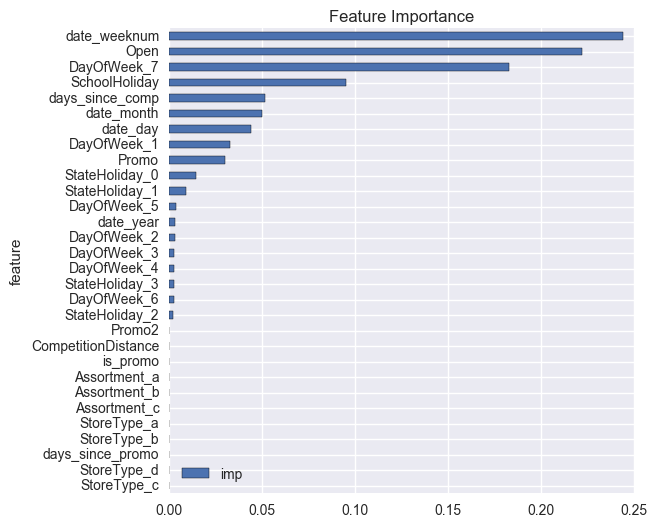

In [103]:
#model_fimp.set_index('feature') \
#          .sort_values(by='imp') \
#          .plot(kind='barh', title='Feature Importance', figsize=(6,6))

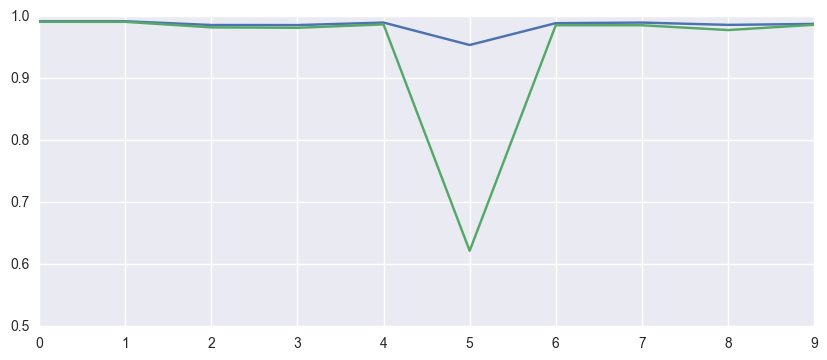

In [126]:
plt.figure(figsize=(10,4))
plt.plot(y1_score)
plt.plot(y2_score)
plt.ylim(0.5,1)
plt.show()

In [ ]:
customer_score = []
customer_pred = []
customer_fimp = []
sales_score = []
sales_pred = []
sales_fimp = []

for i in store.index.values:
    print("Fitting store: ", i)
    X = train_df.loc[i+1]
    X_test = test_df.loc[i+1]
    X_test.pop('Id')
    
    y1 = X.pop('Customers')
    y2 = X.pop('Sales')
    
    clf.fit(X, y1)
    y1_pred = clf.predict(X_test)   
    customer_pred.append(y1_pred) 
    
    clf.fit(X, y2)
    y2_pred = clf.predict(X_test) 
    sales_pred.append(y2_pred)